### Summary 
- Working with subplots to compare and contrast charts. 
- Finer control with gridspec  
- Using matplotlib toolkits, like axes_grid1
- Charts beyond scatterplot, lineplot, bar charts. 
  - Histogram  
  - Boxplot 
  - Heatmaps / 2D Histograms
  - Density Plots  
- Animation. 
- Interactivity 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook

### Working with subplots 
Two ways - 
1. plt.subplot - Let you specify the division of a figure space into rectangular grids, 
and returns **axis of a space** in the gid
2. plt.subplots - Lets you specify the grid, and returns figure and all axes at once, to further iterarte and draw plot on

#### plt.subplot : 
1.  Can Keep the dimensions of axes same on two subplots, by passing axes of first to sharex/y argu of plt.subplot  
2. The indexing of plots starts from 1!  

<IPython.core.display.Javascript object>


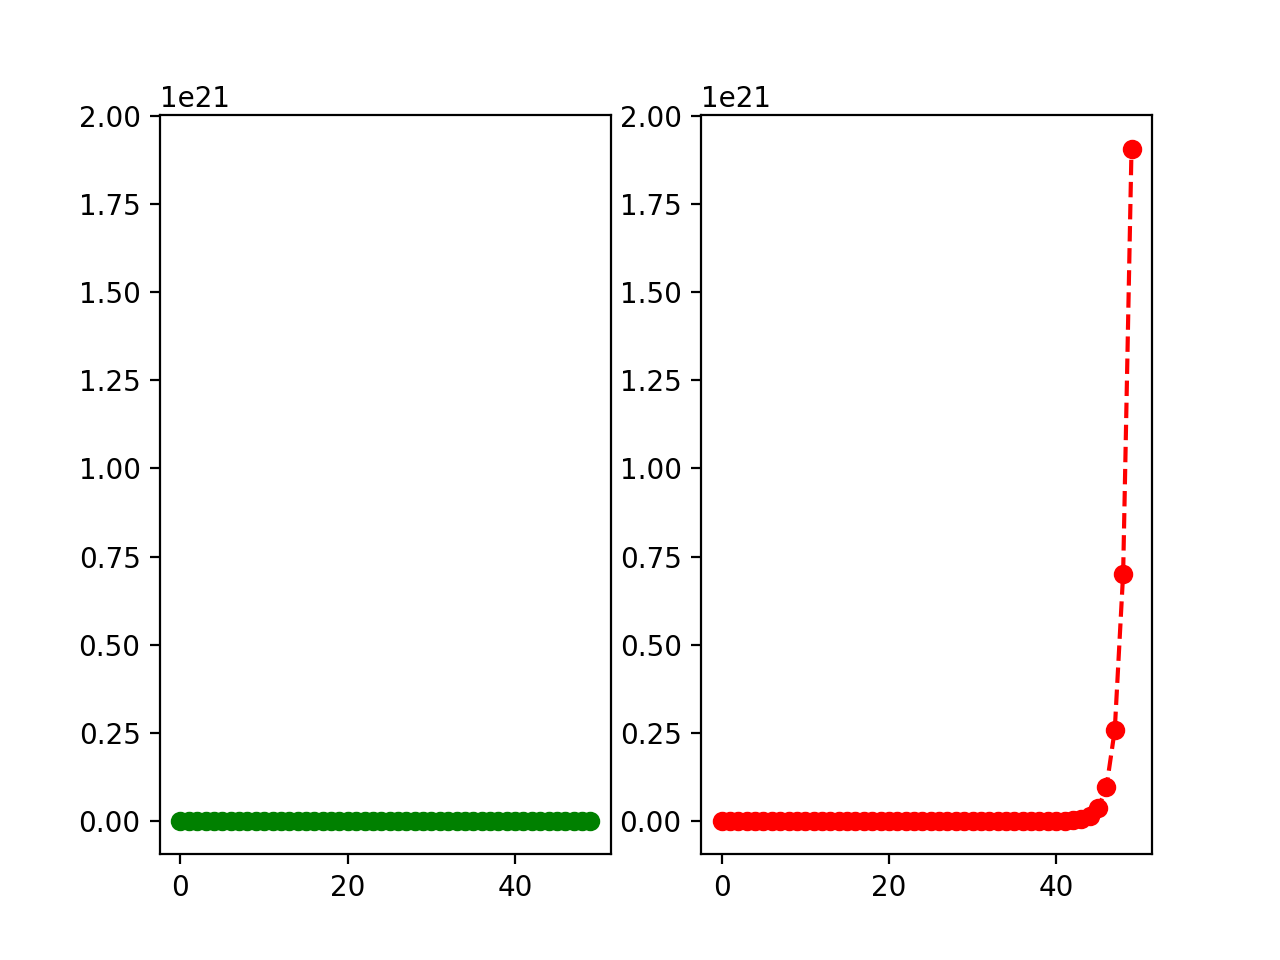

In [2]:
ax1 = plt.subplot(1,2,1) # returns one axes
x = range(50)
ax1.plot(x,'go-')

In [3]:
ax2 = plt.subplot(1,2,2,sharey= ax1) # now returns 2nd axes  
exp_x = np.exp(x)
ax2.plot(exp_x, 'ro--',)

#### plt.subplots() :  
- leftmost and bottommost ticklabels are visible by default  
- indexing starts from 0 as usual 

<IPython.core.display.Javascript object>


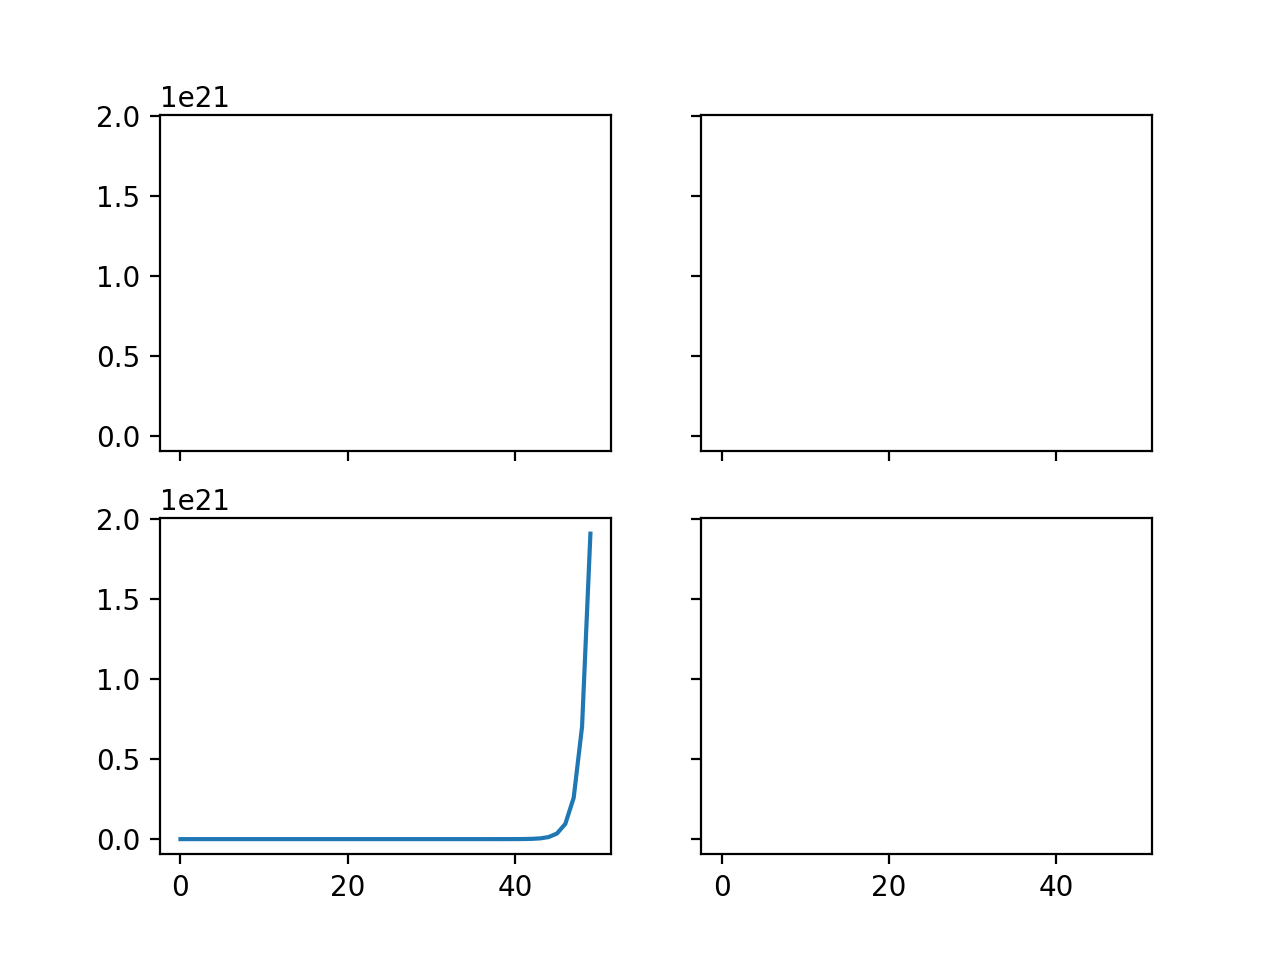

In [4]:
fig,[(ax1,ax2),(ax3,ax4)] = plt.subplots(2,2, sharex = True, sharey=True)

In [ ]:
ax1.plot(x, 'go-')

In [5]:
ax3.plot(exp_x)

### Histograms. 
- Bar chart for frequency distributions of discrete probability distributions  
- **The bin size by default is 10**

<IPython.core.display.Javascript object>


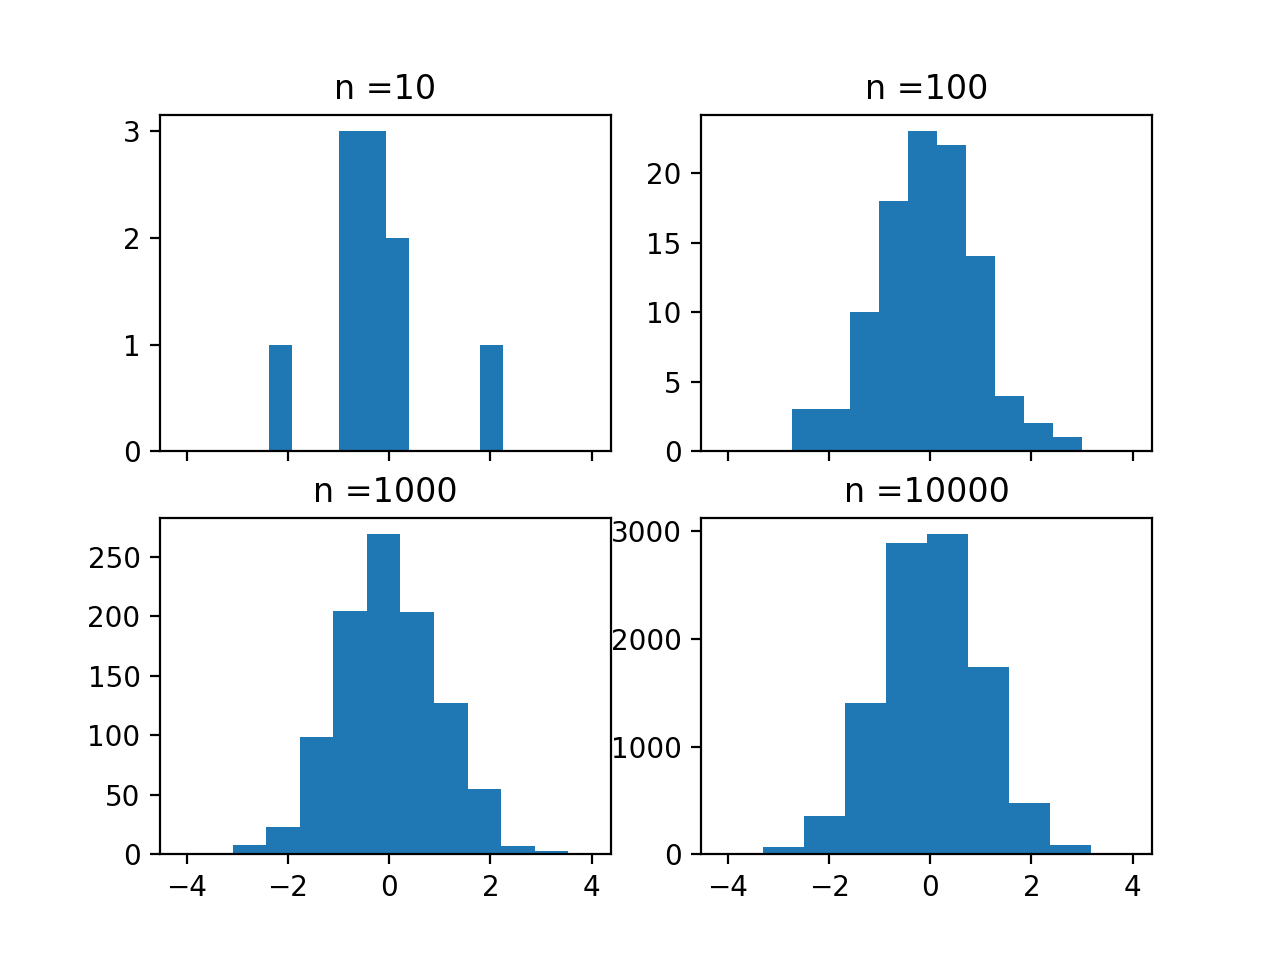

In [6]:
# Sample values from a normal probability distribution and plot hist fof all samples

fig, [(ax1,ax2),(ax3,ax4)] = plt.subplots(2,2, sharex = True) 
ax = [ax1,ax2,ax3,ax4]
for i in range(4):
    s = np.random.normal(loc= 0 , scale= 1, size = 10**(i+1))
    ax[i].hist(s)
    ax[i].set_title('n =' + str(10**(i+1)))
    

**Remember the data are for a sample from nornal distribution, so the distribution shape is not exact   
Check the effect of choice of bins on appearence**


<IPython.core.display.Javascript object>


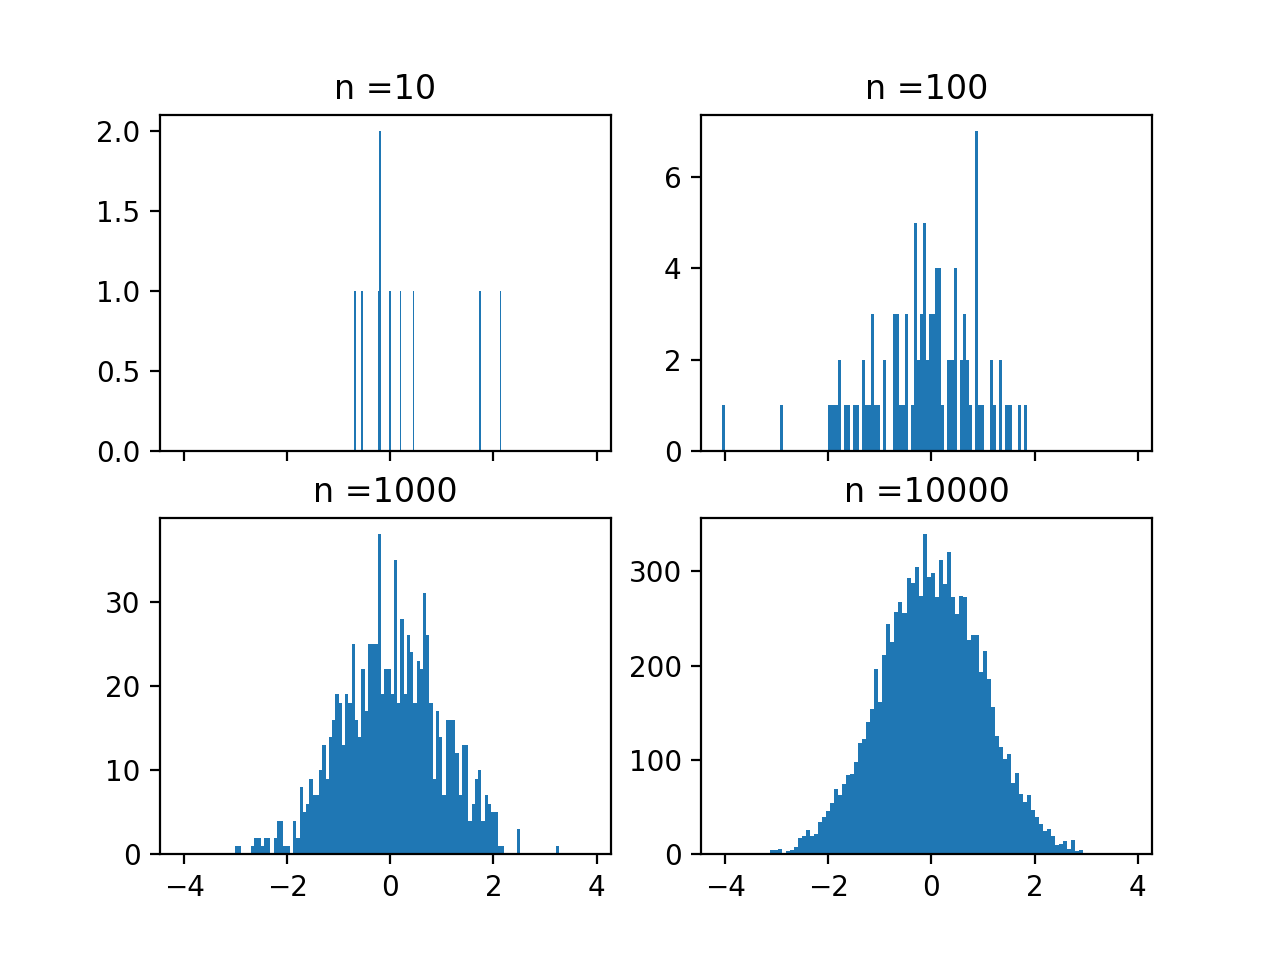

In [7]:
fig, [(ax1,ax2),(ax3,ax4)] = plt.subplots(2,2, sharex = True) 
ax = [ax1,ax2,ax3,ax4]
for i in range(4):
    s = np.random.normal(loc= 0 , scale= 1, size = 10**(i+1))
    ax[i].hist(s,bins = 100)
    ax[i].set_title('n =' + str(10**(i+1)))

##### Binning Choices

### Gridspec 
- allows finer control in creating subplots, in that we can control how much grid space subplots. 
  can cover 

###### Draw a scatter plot and show the univariate distributions on side charts

In [2]:
from matplotlib import gridspec as gp

In [3]:
x = np.random.normal(loc= 0, scale=1,size= 1000)
y = np.random.random(size = 1000)
gspec = gp.GridSpec(3,3) # Creating a grid space using GridSpec, allow us to divide the grid using 
                         # row and column slicing like we do on an array

In [4]:
type(gspec[1:,1:]) # Object of type SubplotSpec,can be passed to subplot

matplotlib.gridspec.SubplotSpec

<IPython.core.display.Javascript object>


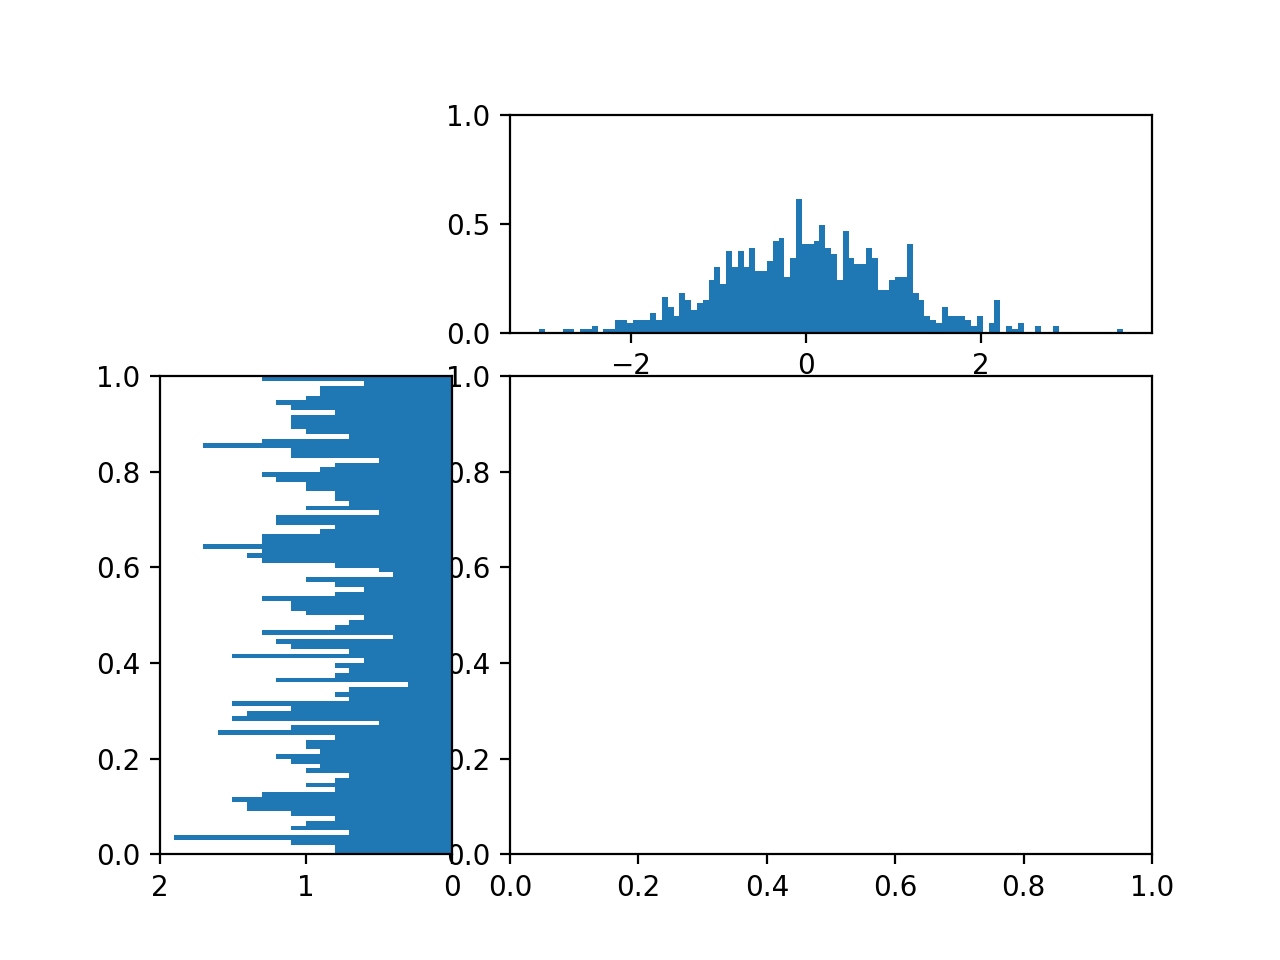

In [12]:
plt.figure()
scatter = plt.subplot(gspec[1:,1:])  # subplot method returns an axes, if you recall
y_hist = plt.subplot(gspec[1:,0])
x_hist = plt.subplot(gspec[0,1:])

In [6]:
scatter.scatter(x,y)
y_hist.hist(x=y,bins= 100,orientation = 'horizontal')
x_hist.hist(x=x,bins= 100,orientation = 'vertical');

###### Changes desired. 
- Convert freq dist. in histograms to rel. frequency. 
- Ensure axis objects align 
- Flip the axis of y_hist

In [13]:
x_hist.clear()  # axis object has a method to clear the primitivr artists drawn on it. 
x_hist.hist(x = x,bins= 100,normed= True)
y_hist.clear()
y_hist.hist(x = y,bins= 100,normed= True, orientation= 'horizontal'); # ;ensure returned objects are not printed
y_hist.invert_xaxis()

In [14]:
for ax in [x_hist,y_hist]:
    ax.set_ylim(bottom = 0, top = 1)

#### Similar Image

In [ ]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

### Boxplots / Box and Whisker Plots. 
- Useful to gauge spread of the data using IQR. 
- Give information about min, max, Quantiles (1,2,3)  
- Indication of skew of data, and outliers

##### Box plots for samples from random, normal and gamma distribution. 

##### Gamma is a two parameter distribution : shape and scale


$p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}$

In [10]:
norm = np.random.normal(loc=0,scale=1,size = 1000)
gam = np.random.gamma(scale= 1, shape = 0.3,size = 1000)
ran = np.random.random(1000)
df = pd.DataFrame({'normal' : norm, 'random' : ran, 'gamma' : gam})
df.describe()

,gamma,normal,random
count,1.000000e+03,1000.000000,1000.000000
mean,2.665778e-01,-0.012781,0.480356
std,4.827081e-01,0.991495,0.283384
min,2.229719e-09,-3.629990,0.000759
25%,5.449134e-03,-0.648574,0.236796
50%,6.319445e-02,-0.044415,0.469714
75%,3.128786e-01,0.644206,0.722747
max,4.503066e+00,3.227379,0.999455


##### Boxplot command takes a sequence of  sequences and plots them.  
- The whis argument can be used to place whiskers at other spots than 1.5 IQR from box. 

##### Most of the plot methods return artist objects, so at times to avoid them you could 
##### simply assign the objects to a temp. variable '_'  - valid var name in python - to unpack values, that we will not use

<IPython.core.display.Javascript object>


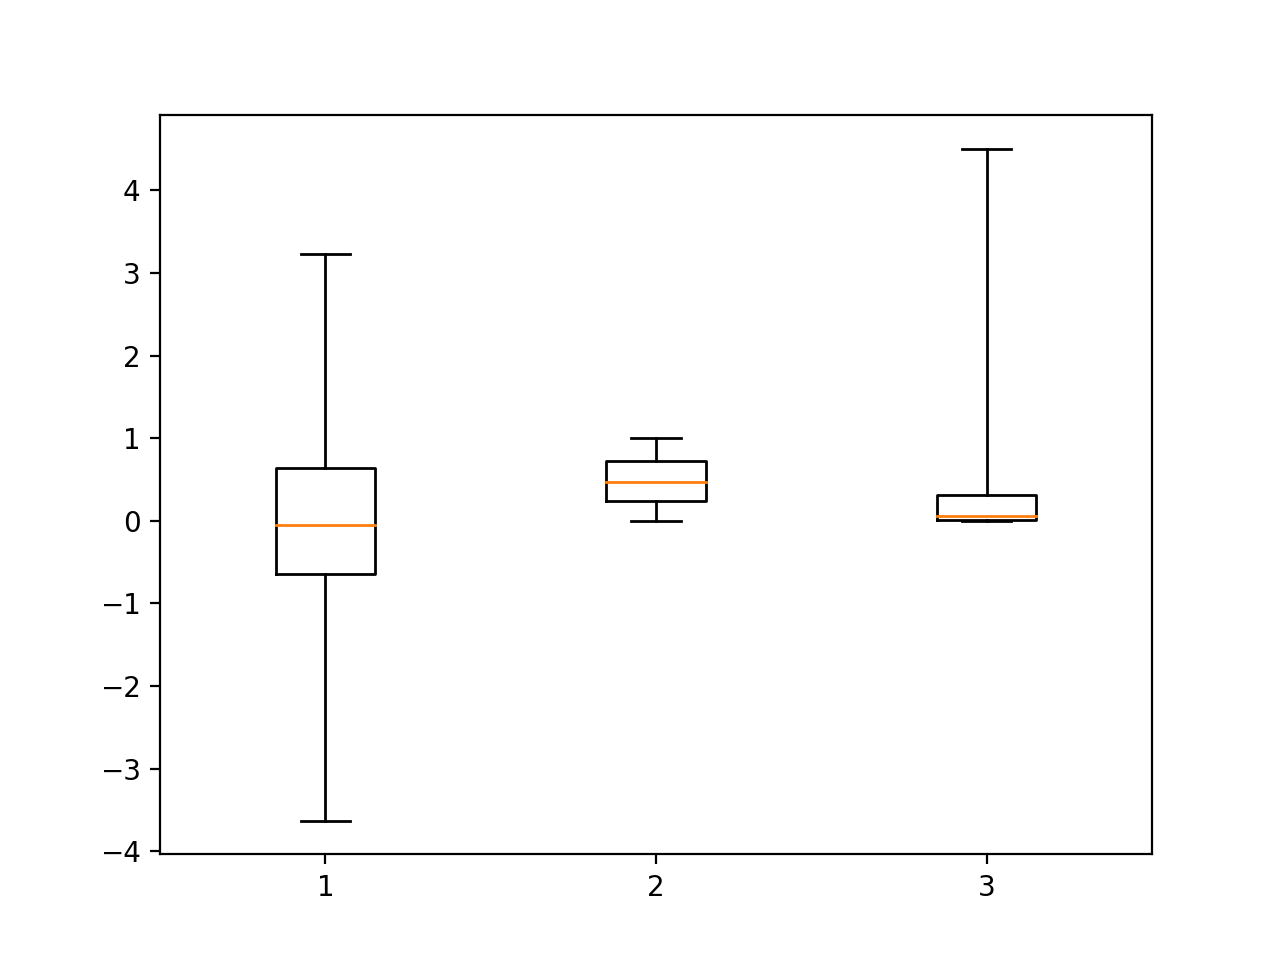

In [15]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']],whis= 'range')

### Matplotlib Tookits. 
- Matplotlib ships with toolkits that although are packaged separately, are considered part of core matplotlib functionality. 
- Eg: axes_grid, which allows drawing multiple plots on the same axes component artist

In [17]:
from mpl_toolkits.axes_grid1 import inset_locator as mp_il

<IPython.core.display.Javascript object>


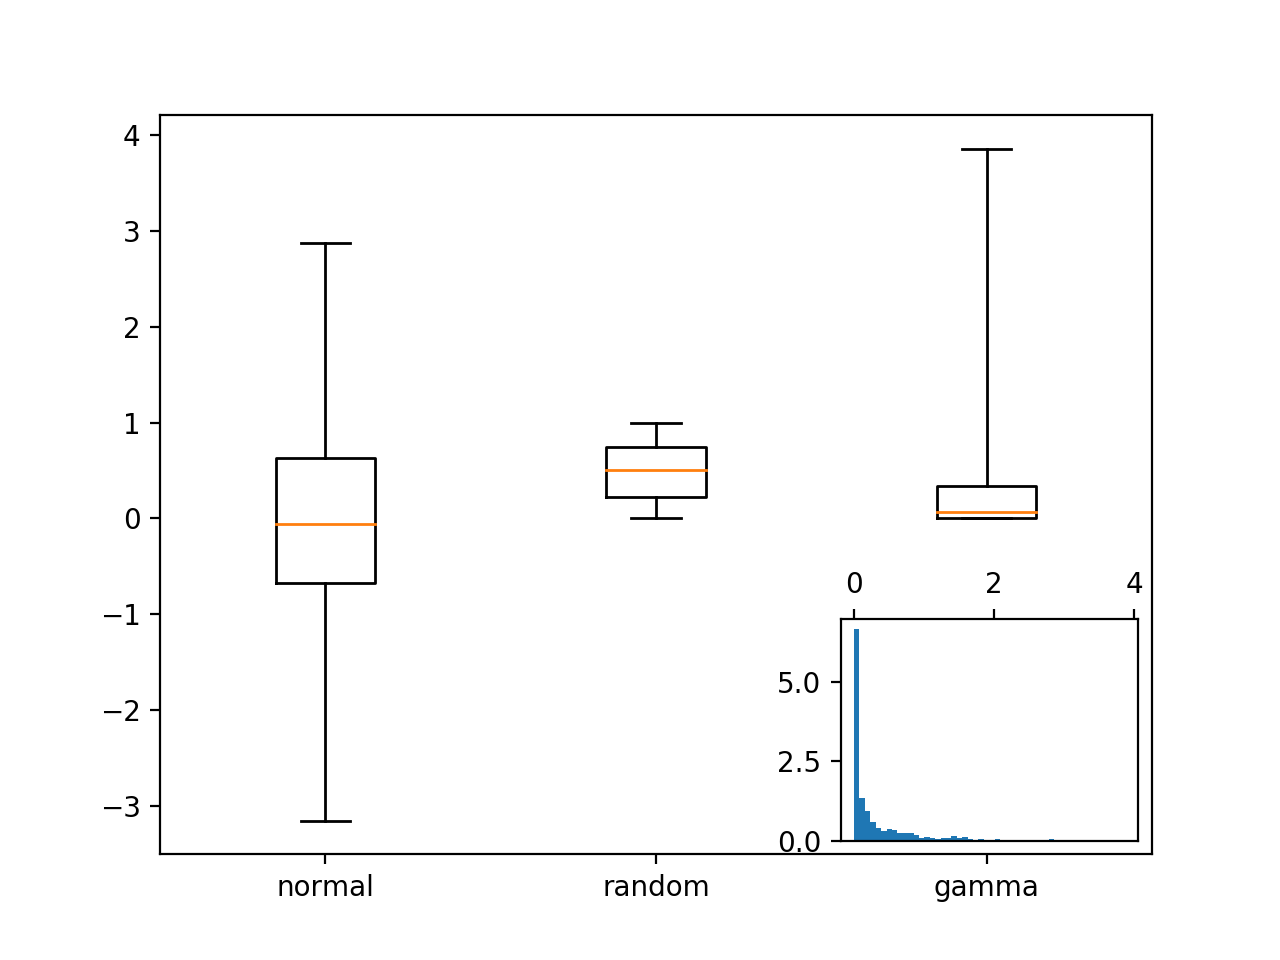

In [18]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']],whis= 'range',labels= ['normal','random','gamma'])

##### Insert histogram of gamma to visalize right skew/long tail to the right

In [19]:
# create a separate inset_axes object, specify height/width in terms of original axes object
ax2 = mp_il.inset_axes(parent_axes= plt.gca(),width= '30%', height = '30%', loc = 'lower right')

##### adjust tick labels on x axis to be at the top

In [20]:
_ = ax2.hist(gam,bins= 50, normed = True) 
ax2.xaxis.tick_top()

##### Boxplot with outliers (called fliers) marked as any outside 1.5IQR

<IPython.core.display.Javascript object>


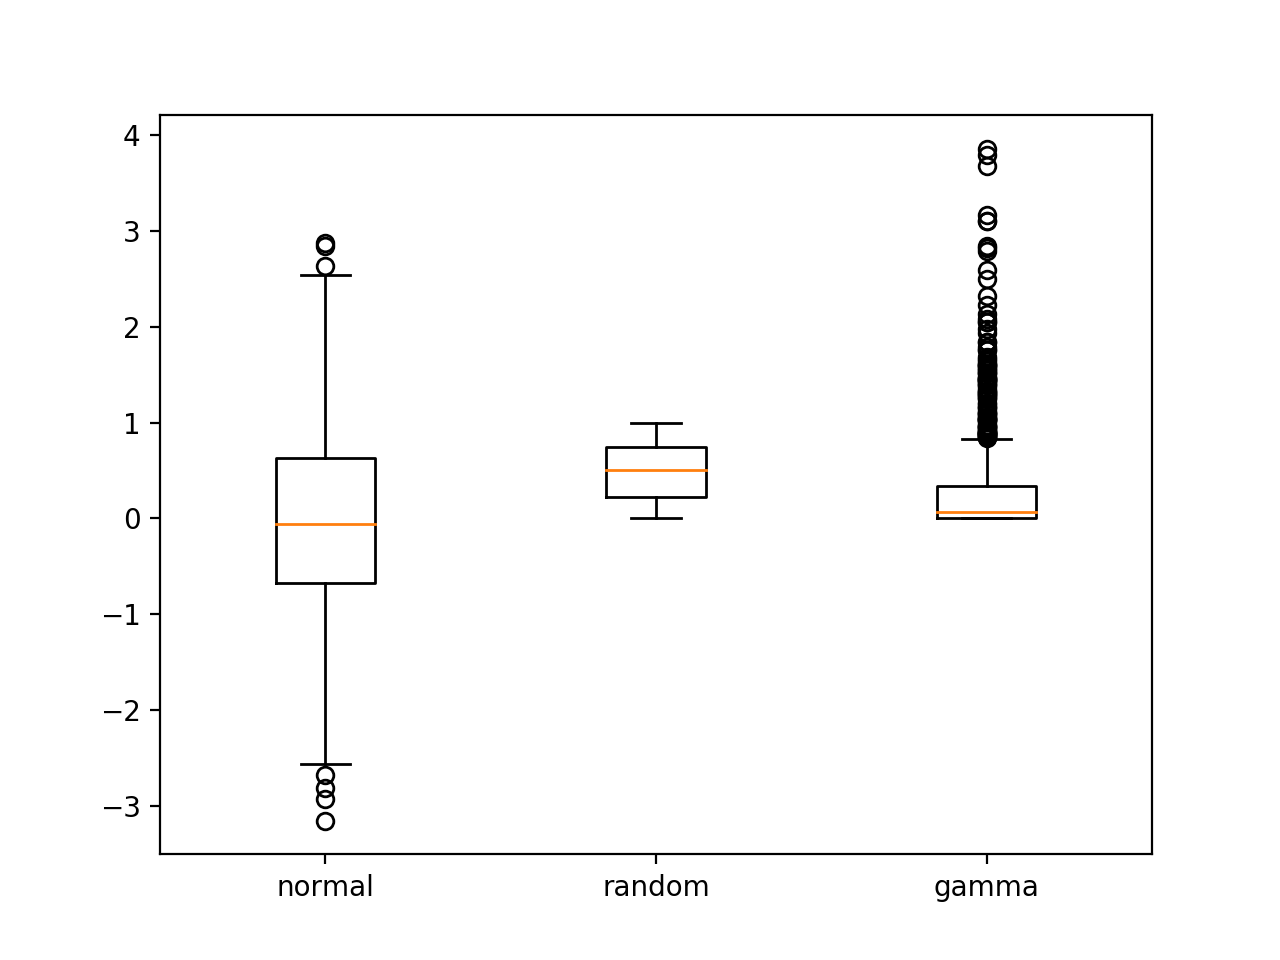

In [21]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']],labels= ['normal','random','gamma'])


##### Boxplot with notches or confidence intervals

<IPython.core.display.Javascript object>


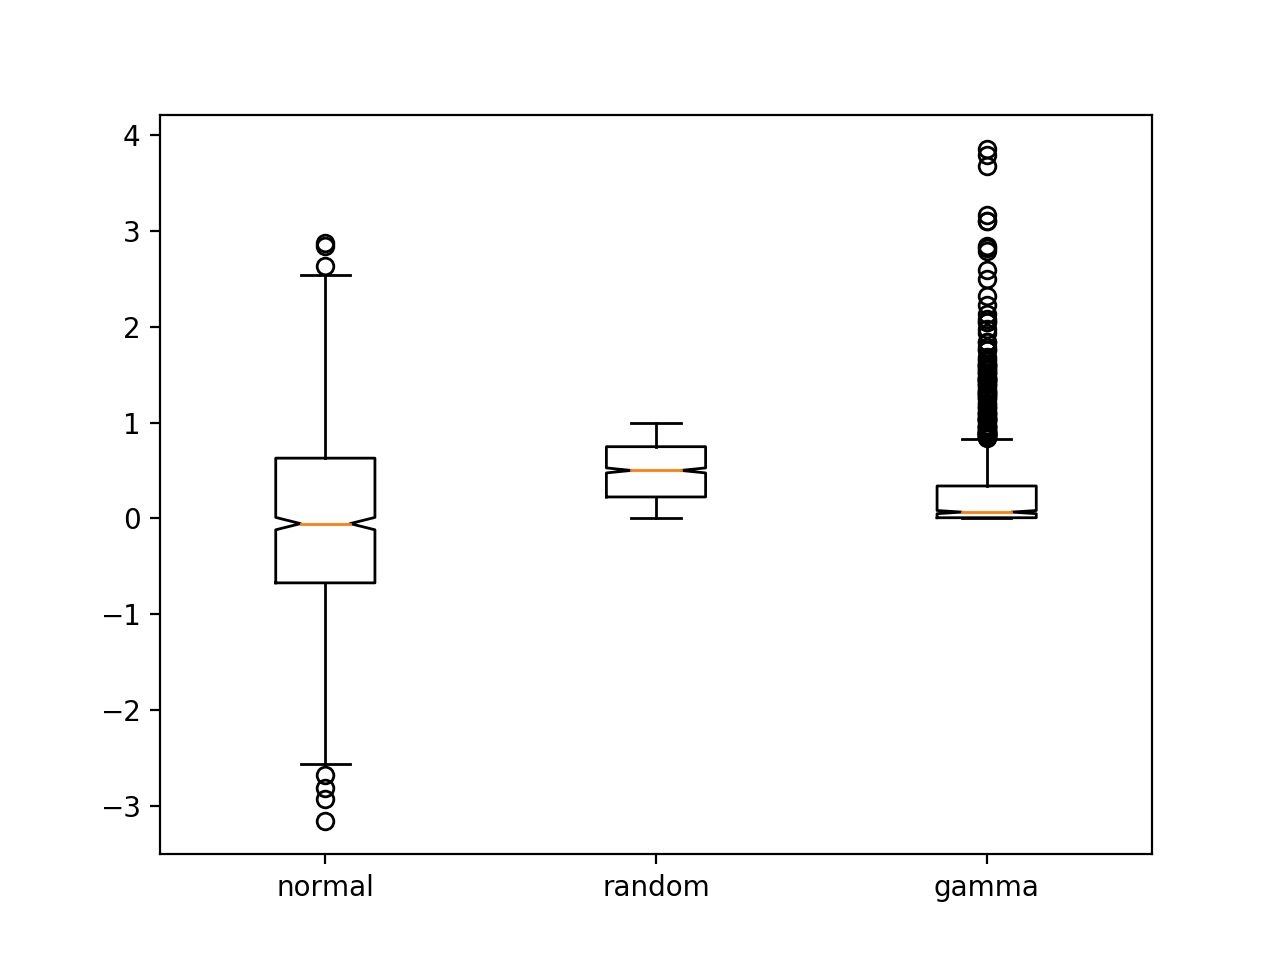

In [22]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']],labels= ['normal','random','gamma'],notch= True)

### Heatmaps  
- are good to represent more than 2 dimensions of data with a cintinuum of color. BUT. 
- It is only good when color is mapped to a continuous variable     
- Showing how temp. varies with lat long on a heatmap is good, with color indicating variation in temp

#### his2d function, draws a 2 dimensional histogram, i.e bins both variables x and y, then plots a grid of x and y bins, with counts capturing the cell values, color is used to represent the cell values  
- a scatter plot can become very dense if the no. of points are too many, you'll not be able to distinguish where density is really high (3-4 dots overlapping) versus where just 2 dots are overlapping
- 2Dhistogram with color mapped to count can help distinguish that

<IPython.core.display.Javascript object>


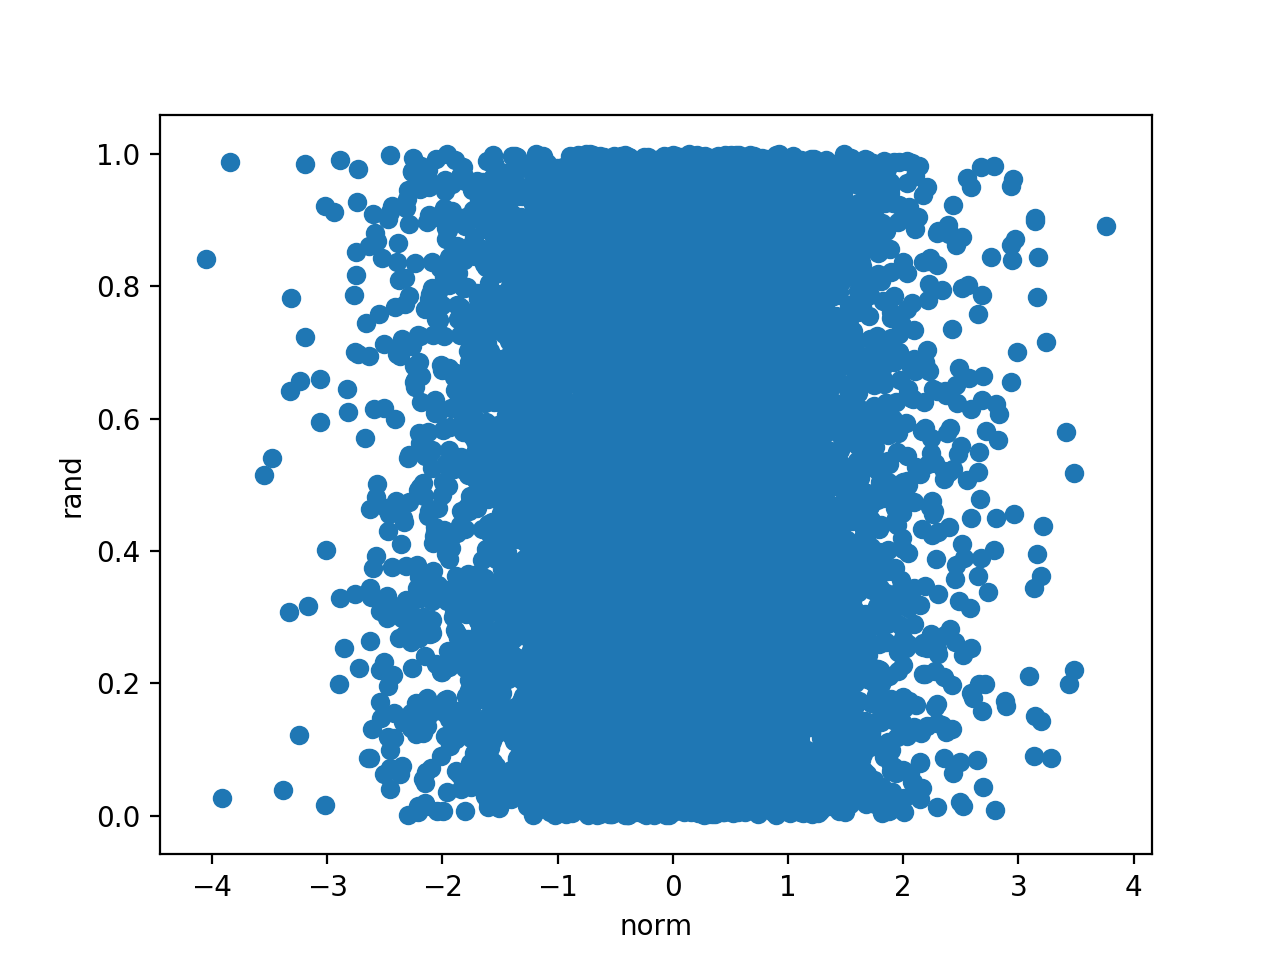

Text(0,0.5,'rand')

In [23]:
norm = np.random.normal(0,1,10000)
rand = np.random.random(10000)
plt.figure()
plt.scatter(norm,rand)
plt.xlabel('norm')
plt.ylabel('rand')

In [ ]:
plt.figure()
_ = plt.hist2d(norm,rand,bins = 10)
plt.xlabel('norm')
plt.ylabel('rand')
plt.colorbar()

##### Below shows the density is really high in yellow spots, making it much clear than scatterplot

<IPython.core.display.Javascript object>


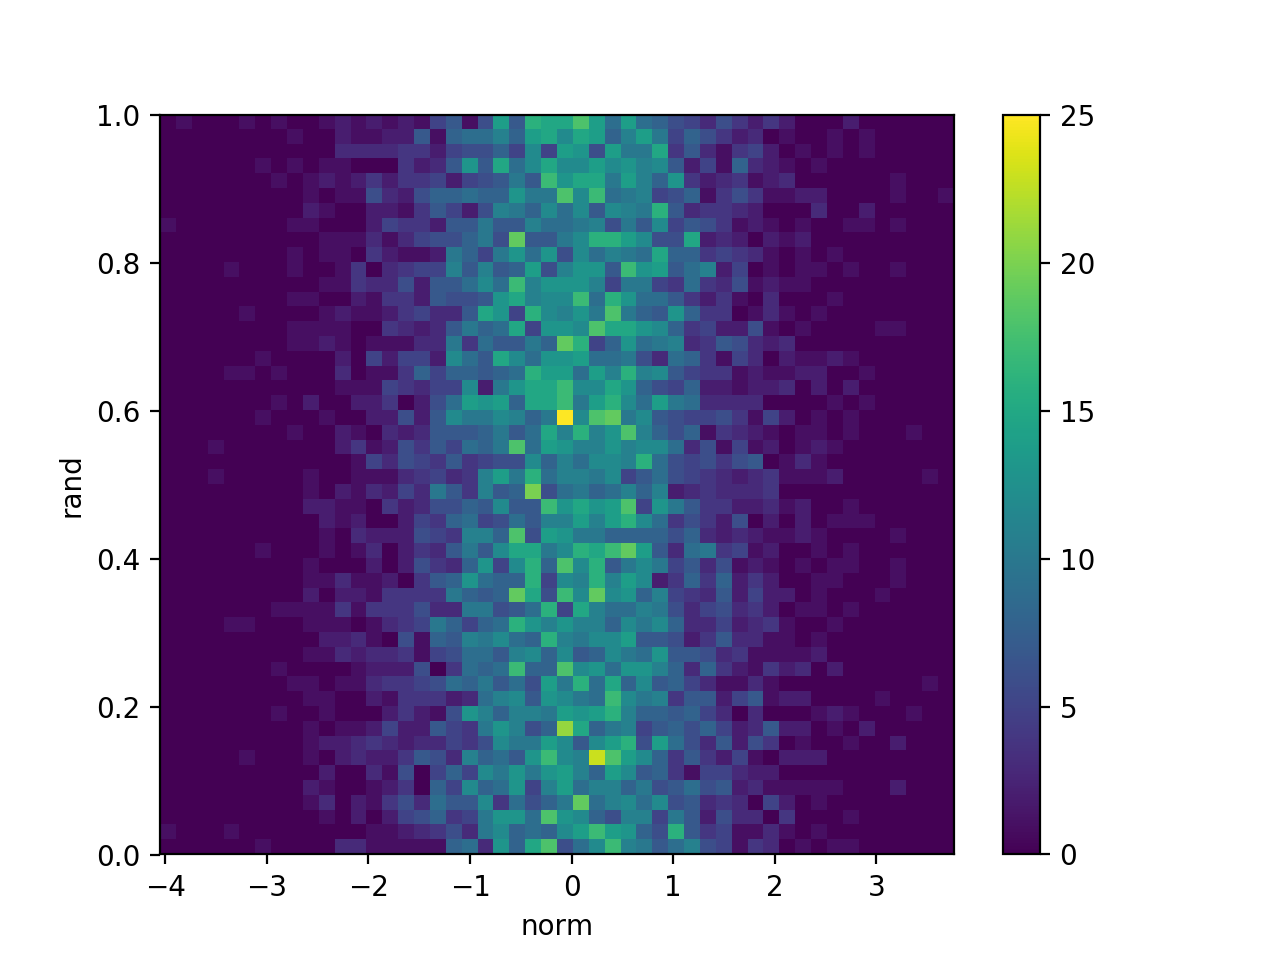

In [24]:
plt.figure()
_ = plt.hist2d(norm,rand,bins = 50)
plt.xlabel('norm')
plt.ylabel('rand')
plt.colorbar()

### Animation  
- separate toolkit in matplotlib   
-  requires a backend to support animation, nbagg backend does
- a main method is FuncAnimation. 
  - takes a figure to plot on. 
  - a function which is repeatedly called after a defined interval .  
    - **the first argument of this function is itereatively passed to be the next value from frames, an argument in 
      FuncAnimation. **
    - this function needs to clear the axes and draw a new frame or needs to get a list of objects to draw  
- the animated charts can be saved to a file, but need some third part tools like 'ffmpeg'.     

##### Use animation to show shape of normal distribution with increase in sample size

In [25]:
import matplotlib.animation as anm

In [26]:
x = np.random.randn(100)

In [33]:
def custom_fun(count):
    print(count)
    if(count == 100):
        a.event_source.stop() # FuncAnimation inherits from animation class, which has a subclass event_source
    plt.cla() # clears the axes. 
    bins = np.arange(-4,4,0.5) # bins will need to be fixed for every frame to show the continuous effect
    plt.axis([-4,4,0,30]) # fix the axes limits so that it does not changes with every frame
    plt.hist(x[:count], bins = bins)
    plt.xlabel("Bins")
    plt.ylabel("Counts")
    plt.title("Sampled Normal Distribution")
    plt.annotate(s = 'n = {}'.format(count), xy = [3,27])

<IPython.core.display.Javascript object>


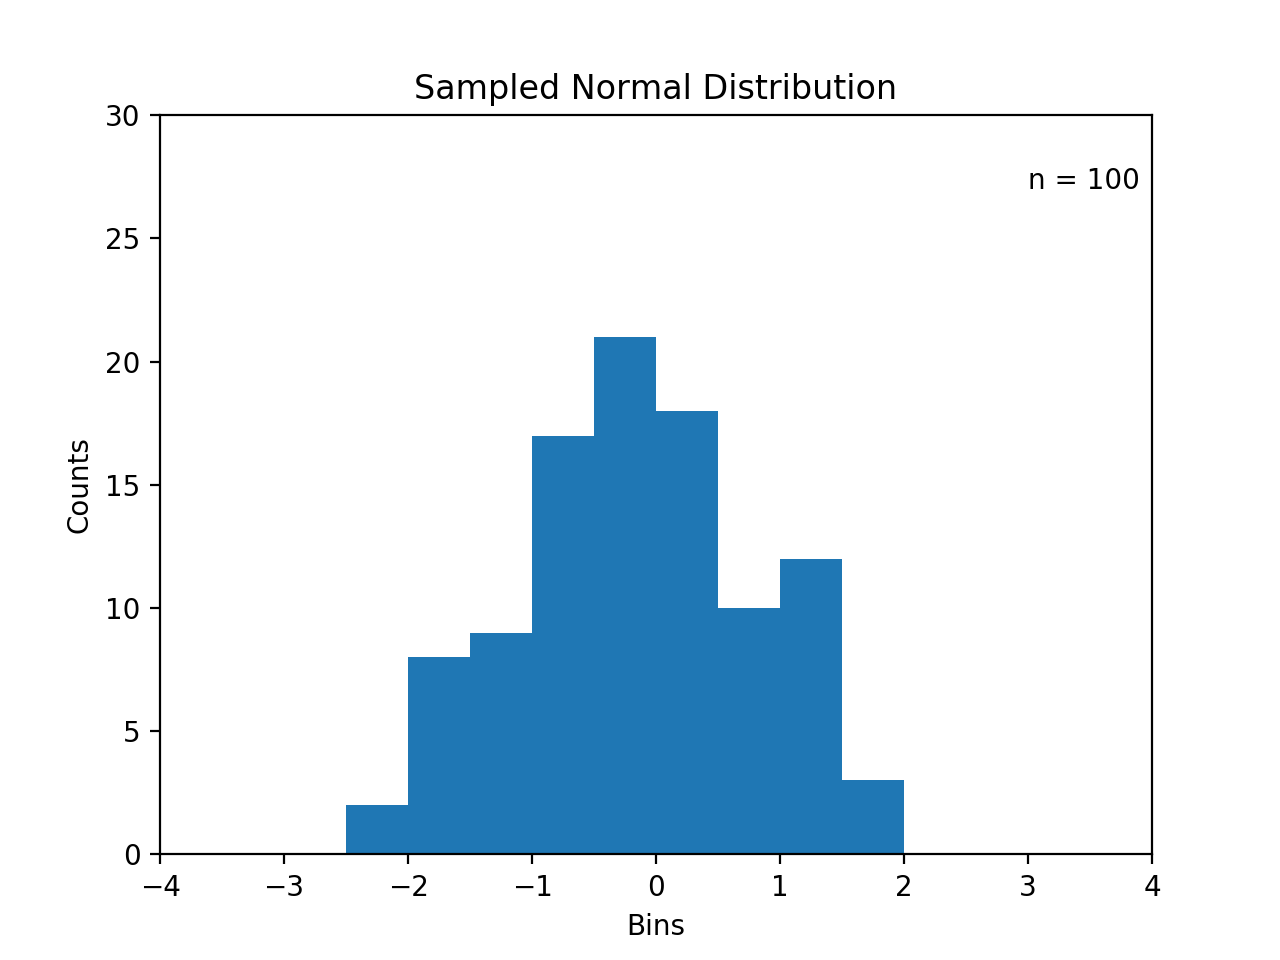

In [34]:
fig = plt.figure()
a = anm.FuncAnimation(fig = fig, func = custom_fun, frames = 101 , interval = 100 )
# frames goes from 0 to n-1

### Interactivity  
- Needs using artist layer more esp. canvas object that is used to draw artists, and 
  is connected to the backend
- Uses event listening. 
  - Events can be thought of as data, and s/w wnvironment makes a function call with the data in case
    of event.  
  - Event examples are : mouse clicks, scrolls, button presses etc. 

##### Display x,y coordinates on a figure by listening to a button press event

In [34]:
x = np.random.rand(100)
y = np.random.randn(100)
plt.figure()
#plt.plot(x,y, 'go')

In [35]:
%matplotlib notebook

In [36]:
def onclick(event):
    """Picks a button press event object, and using the data in the object 
       displays where the event occured in x,y space"""
    #plt.cla()
    #plt.plot(x,y)
    x = np.random.rand(100)
    y = np.random.randn(100)
    plt.figure()
    plt.plot(x,y, 'go')
    (plt.gca().set_titile('mouse press at pixels {},{},\n and data {},{}'
                         .format(event.x, event.y, event.xdata, event.ydata)))
    

<IPython.core.display.Javascript object>


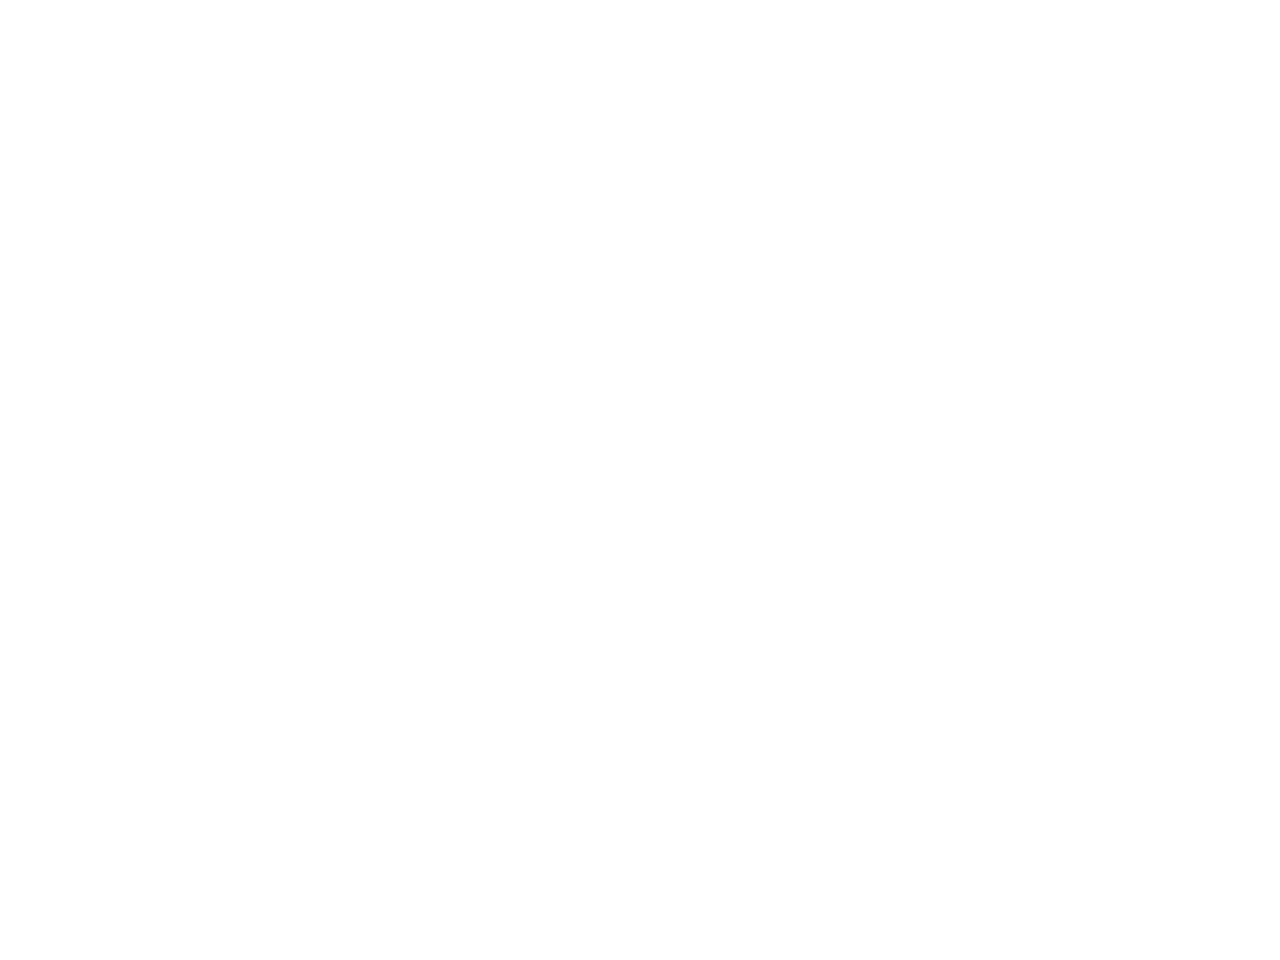

8

In [37]:
plt.gcf().canvas.mpl_connect('button_press_event', onclick)